<a href="https://colab.research.google.com/github/Suweslab/sentiments-final/blob/main/Copy_of_visualise_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Inspect and (optiopnally) clean the data
4. Formalise questions to answer
3. Visually perform analysis, in our case sentintment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

Although this step is being executed first it the notbook, a lot of earlier research into the problem was done to identify the packages needed.

**Sentiment analysis** the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral

Step 1: Data collection. This is one of the most important steps in the sentiment analysis process. ...
Step 2: Data processing. The processing of the data will depend on the kind of information it has - text, image, video, or audio. ...
Step 3: Data analysis. ...
Step 4 - Data visualization

In [ ]:
from google.colab import output
#the link below point to s cript containing a set of stop words.
#these words will be filtered out
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
#Textblob is a library that supports complex nanalysis of text
!pip install TextBlob
output.clear()
print("Required packages installed")


Required packages installed


## 2. Get the Data

In [ ]:
# Downloads the tweets. !curl simulates a web connection and download the tweet in this link
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/trump_tweets.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.3M  100 12.3M    0     0  18.8M      0 --:--:-- --:--:-- --:--:-- 18.8M


In [ ]:
import re

def clean(text):
  ''' Uses regular expresison to extract english letter and digits from the supplied text. '''
  ''' Regex decoding:
        Regular expression (Regex) is used to filter matching expressions.
        The match filter is enclosed in double quotes
        (@[A-Za-z0-9]+) -> match the '@' character followed by one or more contiguous occurences of alphanumeric characters
        | -> the OR logic
        ([^0-9A-Za-z \t]) -> match an occurrence of alphanumeric or space or tab
        (\w+:\/\/\S+) _ one or more words followed by '://' and one or more spaces or tabs'''
  regExp = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"

#this filters out every pattern of characters matching the regualr expressions in the text.
  return ' '.join(re.sub(regExp, " ", text).split())



In [ ]:
#This line imports the pandas library and assigns it the alias pd. Pandas is a powerful library for data manipulation and analysis in Python.
import pandas as pd

tweets_df = pd.read_csv('trump_tweets.csv')


'''This line creates a new column named "Clean Text" in the DataFrame tweets_df.
It iterates through the existing "text" column and applies the function  clean
pen_spark '''

tweets_df['Clean Text'] = tweets_df['text'].apply(clean)
tweets_df.head()




  cleaned data 




,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,Clean Text
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,Republicans and Democrats have both created ou...
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,I was thrilled to be back in the Great city of...
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,RT Herridge READ Letter to surveillance court ...
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,RT Very friendly telling of events here about ...


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html


### Polarity
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

    0.0: Represents objective text, likely containing facts and information.
    1.0: Represents subjective text, likely expressing personal opinions or beliefs.

### Subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

     -1.0: Represents the most negative sentiment.
      0.0: Indicates a neutral sentiment (no positive or negative leaning).
      1.0: Represents the most positive sentiment.

In [ ]:
from textblob import TextBlob

# Wrapper so can use Pandas apply() function on a column
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
     return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment,
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head()

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,Clean Text,Subjectivity,Polarity
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,Republicans and Democrats have both created ou...,0.200000,0.200000
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,I was thrilled to be back in the Great city of...,0.483333,0.450000
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,RT Herridge READ Letter to surveillance court ...,0.300000,0.050000
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...,0.454762,0.029464
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,RT Very friendly telling of events here about ...,0.500000,0.268750


In [ ]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column=['Subjectivity','Polarity'], grid=False, figsize=(12,8))


# Sentiment over time.

From the documentaiton, the values of polsrity can be interpreted a sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for thie exercise.

It could be interesting to plot these over time.  SO each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [ ]:
def sentiment(polarity):
  if polarity > 0:
      return 'positive'
  elif polarity == 0:
      return 'neutral'
  else:
      return 'negative'

In [ ]:
# Add sentiment column
tweets_df['Sentiment'] = tweets_df['polarity'].apply(sentiment)

In [ ]:
# Lets get just the positive tweets
pos = tweets_df[tweets_df['Sentiment'] == 'positive']
pos.head()

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,Clean Text,Subjectivity,Polarity,Sentiment
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,Republicans and Democrats have both created ou...,0.200000,0.200000,positive
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,I was thrilled to be back in the Great city of...,0.483333,0.450000,positive
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,RT Herridge READ Letter to surveillance court ...,0.300000,0.050000,positive
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...,0.454762,0.029464,positive
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,RT Very friendly telling of events here about ...,0.500000,0.268750,positive


Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [ ]:
def num_tweets(df):
    return df['date'].value_counts().sort_index()

pos_per_day = num_tweets(pos)

<Axes: xlabel='date'>

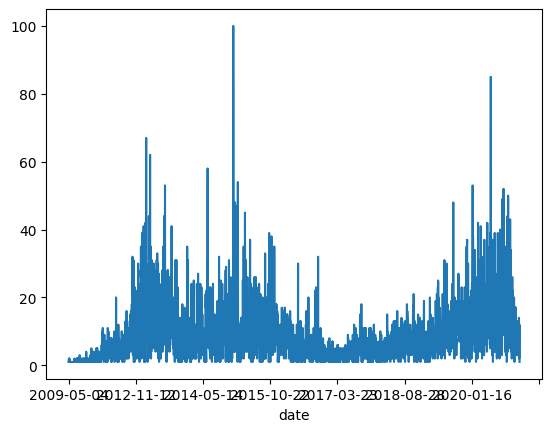

In [ ]:
# Plot the positive tweets per day
pos_per_day.plot()

<Axes: xlabel='date'>

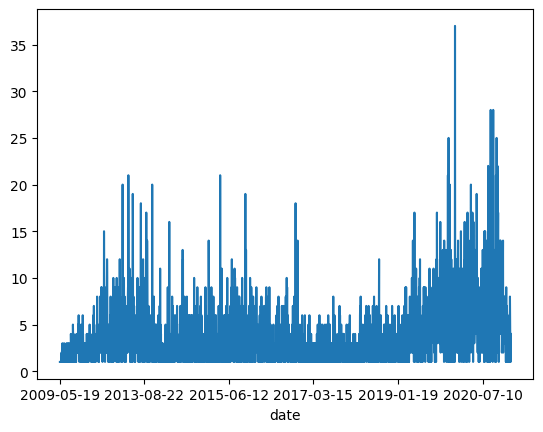

In [ ]:
# Now repeat for negative
negs = tweets_df[tweets_df['Sentiment'] == 'negative']
negs.head()
negs_per_day = num_tweets(negs)
negs_per_day.plot()

<Axes: xlabel='date'>

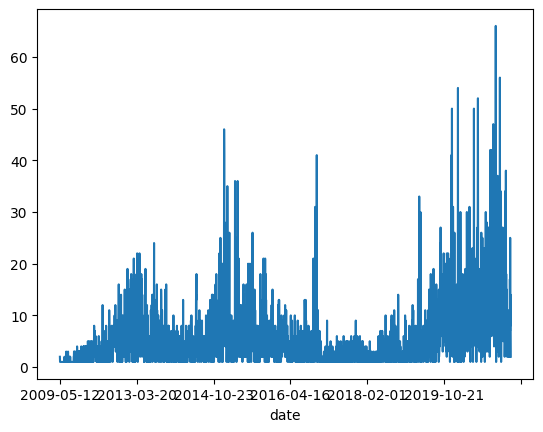

In [ ]:
# repeat for neutral
neuts = tweets_df[tweets_df['Sentiment'] == 'neutral']
#neuts.head()
neuts_per_day = num_tweets(neuts)
neuts_per_day.plot()

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

([<matplotlib.patches.Wedge at 0x79e7716e72b0>,
 [Text(-0.09368543565231843, 1.0960032112848188, ''),
  Text(-0.8144235465501827, -0.739401302963839, ''),
  Text(0.6673514342840787, -0.874438141413664, '')])

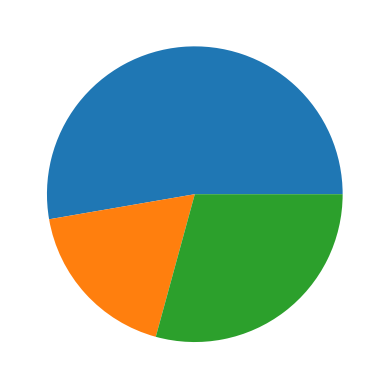

In [ ]:
import matplotlib.pyplot as plt
values = [len(pos),len(negs),len(neuts)]
plt.pie(values)

We can do better.

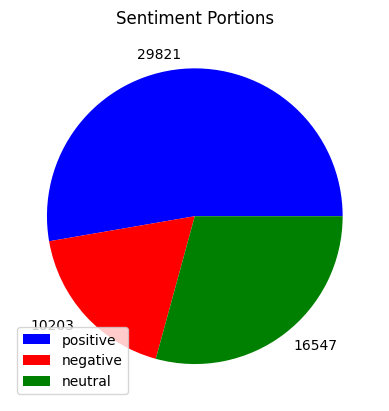

In [ ]:
import matplotlib.pyplot as plt

values = [len(pos),len(negs),len(neuts)]
labels = ['positive', 'negative','neutral']
colors =['b','r','g']
plt.pie(values, colors=colors, labels= values)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

## WordCloud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and loot at the example

Enter Filter Search Term: President


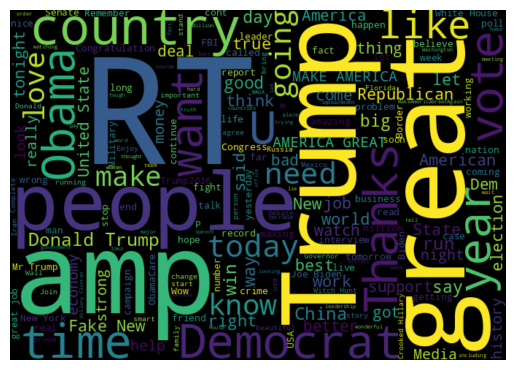

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS #Load the set of stopwords from the downloaded file

# Get all the messages
messages = ' '.join(tweets_df['Clean Text'])

search_term = input("Enter Filter Search Term: ")
stop_words = ENGLISH_STOP_WORDS.add(search_term)
# Create the wordcloud object
wordcloud = WordCloud(width=680, height=480, margin=0,
                      stopwords=ENGLISH_STOP_WORDS).generate(messages)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()